In [1]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset)
# save to file
dataset.to_csv('pollution.csv')

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0
2010-01-02 05:00:00      109.0   -7  -6.0  1022.0      SE     7.14     3     0
2010-01-02 06:00:00      105.0   -7  -6.0  1023.0      SE     8.93     4     0
2010-01-02 07:00:00      124.0   -7  -5.0  1024.0      SE    10.72     0     0
2010-01-02 08:00:00      120.0   -8  -6.0  1024.0      SE    12.51     0     0
2010-01-02 09:00:00      132.0   -7  -5.0  1025.0      SE    14.30     0     0
2010-01-02 10:00:00      140.0   -7  -5.0  1026.0   

In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


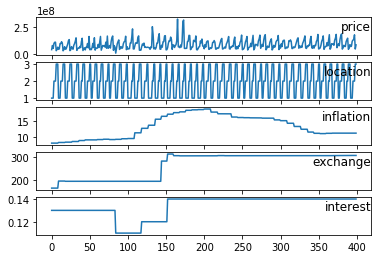

In [3]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('tunsa.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [4]:
dataset

,price,location,inflation,exchange,interest
2015-01-01,,,,,
2015-01-01,37500800,1,8.20,167.50,0.13
2015-01-01,76227560,1,8.20,167.50,0.13
2015-01-01,49250450,1,8.20,167.50,0.13
2015-01-01,95865025,2,8.20,167.50,0.13
2015-01-01,106251507,2,8.20,167.50,0.13
2015-01-01,106965125,2,8.20,167.50,0.13
2015-01-01,27845690,3,8.20,167.50,0.13
2015-01-01,38800750,3,8.20,167.50,0.13
2015-02-01,60800524,3,8.20,167.50,0.13


In [5]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = read_csv('tunsa.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed)

     var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1     0.102388        0.0   0.000000   0.000000   0.666667  0.224769
2     0.224769        0.0   0.000000   0.000000   0.666667  0.139518
3     0.139518        0.0   0.000000   0.000000   0.666667  0.286825
4     0.286825        0.5   0.000000   0.000000   0.666667  0.319647
5     0.319647        0.5   0.000000   0.000000   0.666667  0.321903
6     0.321903        0.5   0.000000   0.000000   0.666667  0.071877
7     0.071877        1.0   0.000000   0.000000   0.666667  0.106496
8     0.106496        1.0   0.000000   0.000000   0.666667  0.176018
9     0.176018        1.0   0.000000   0.000000   0.666667  0.111394
10    0.111394        0.0   0.019011   0.206897   0.666667  0.124981
11    0.124981        0.0   0.019011   0.206897   0.666667  0.279510
12    0.279510        0.0   0.019011   0.206897   0.666667  0.282987
13    0.282987        0.5   0.019011   0.206897   0.666667  0.335762
14    0.335762        0.5   0.0190

In [6]:
values = reframed.values
n_train_hours = 365 * 24
train = values
test = values
# split into input and outputs
train_X, train_y = train[0:319, :-1], train[0:319, -1]
test_X, test_y = test[320:399, :-1], test[320:399, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(319, 1, 5) (319,) (79, 1, 5) (79,)


In [11]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(399, 1, 5) (399,) (0, 1, 5) (0,)


Train on 319 samples, validate on 79 samples
Epoch 1/50
 - 1s - loss: 0.2197 - val_loss: 0.2018
Epoch 2/50
 - 0s - loss: 0.1746 - val_loss: 0.1521
Epoch 3/50
 - 0s - loss: 0.1403 - val_loss: 0.1223
Epoch 4/50
 - 0s - loss: 0.1244 - val_loss: 0.1107
Epoch 5/50
 - 0s - loss: 0.1194 - val_loss: 0.1088
Epoch 6/50
 - 0s - loss: 0.1182 - val_loss: 0.1094
Epoch 7/50
 - 0s - loss: 0.1173 - val_loss: 0.1089
Epoch 8/50
 - 0s - loss: 0.1159 - val_loss: 0.1074
Epoch 9/50
 - 0s - loss: 0.1141 - val_loss: 0.1056
Epoch 10/50
 - 0s - loss: 0.1124 - val_loss: 0.1039
Epoch 11/50
 - 0s - loss: 0.1109 - val_loss: 0.1028
Epoch 12/50
 - 0s - loss: 0.1098 - val_loss: 0.1022
Epoch 13/50
 - 0s - loss: 0.1091 - val_loss: 0.1020
Epoch 14/50
 - 0s - loss: 0.1084 - val_loss: 0.1016
Epoch 15/50
 - 0s - loss: 0.1075 - val_loss: 0.1013
Epoch 16/50
 - 0s - loss: 0.1067 - val_loss: 0.1009
Epoch 17/50
 - 0s - loss: 0.1059 - val_loss: 0.1006
Epoch 18/50
 - 0s - loss: 0.1051 - val_loss: 0.1003
Epoch 19/50
 - 0s - loss: 0.

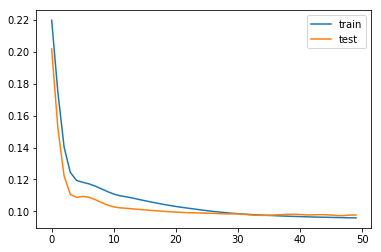

In [7]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [8]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
inv_y


Test RMSE: 39042236.634


array([1.07227400e+08, 1.35000848e+08, 1.47374160e+08, 5.09542600e+07,
       7.36547520e+07, 5.64657000e+07, 6.98502000e+07, 5.85009520e+07,
       9.65753680e+07, 1.12630472e+08, 1.35662000e+08, 1.65125696e+08,
       5.41112200e+07, 4.81502480e+07, 7.15172000e+07, 6.54507000e+07,
       8.00006000e+07, 7.62310480e+07, 1.31721408e+08, 1.60321664e+08,
       5.48302640e+07, 5.01417760e+07, 7.39518480e+07, 5.20506360e+07,
       7.82500000e+07, 7.50005360e+07, 1.13254768e+08, 1.26800152e+08,
       1.78655664e+08, 4.39307400e+07, 4.74292160e+07, 5.34508000e+07,
       7.69007360e+07, 1.15367128e+08, 1.33033056e+08, 1.65333664e+08,
       4.05541200e+07, 5.74265480e+07, 6.54876320e+07, 6.86251040e+07,
       1.02600480e+08, 7.21415920e+07, 1.22005472e+08, 1.76500144e+08,
       4.18504440e+07, 5.41457800e+07, 9.30004880e+07, 9.00008000e+07,
       9.11542320e+07, 7.82365440e+07, 1.24514736e+08, 1.44161344e+08,
       1.79354112e+08, 5.55682120e+07, 7.69471200e+07, 9.22157520e+07,
      

In [9]:
dff=DataFrame(inv_y)
dff.head(50)

,0
0,107227400.0
1,135000848.0
2,147374160.0
3,50954260.0
4,73654752.0
5,56465700.0
6,69850200.0
7,58500952.0
8,96575368.0
9,112630472.0
